In [17]:
# Импорты и загрузка данных
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if '../src' not in sys.path:
    sys.path.append('../src')
from database import load_corrosion_data_new as load_data
from analysis import AdvancedCorrosionAnalyzer


In [35]:
# Настройки
sns.set(style='whitegrid')
TARGET = 'worst_corrosion_rate_mm_per_year'

# Загрузка
DF_loaded = load_data()
assert TARGET in DF_loaded.columns, 'В данных отсутствует corrosion_rate_mm_per_year'

print(f"Данные: {len(DF_loaded):,} строк, {len(DF_loaded.columns)} колонок")
print('Колонки:')
print(sorted(DF_loaded.columns.tolist()))

Данные: 143,062 строк, 45 колонок
Колонки:
['ammonia_content', 'avg_corrosion_rate_mm_per_year', 'chloride_aggressiveness', 'chlorine_content', 'co2_content', 'component_type_id', 'component_type_name', 'contour', 'corrosion_aggressiveness_index', 'corrosion_inhibitor_content', 'corrosion_protection_index', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'equipment', 'equipment_age_years', 'h2s_aggressiveness_index', 'h2s_content', 'h2s_water_ratio', 'hydrochloric_acid_content', 'inner_diameter', 'installation', 'material_code', 'material_resistance_score', 'material_type', 'measurement_date', 'measurement_points_in_section', 'min_corrosion_rate_mm_per_year', 'nominal_thickness_mmc', 'operating_pressure', 'operating_temperature', 'outer_diameter', 'oxygen_content', 'pitting_corrosion_index', 'section_number', 'stress_corrosion_index', 'tmin_mmc', 'total_acidity_index', 'total_acids', 'total_chlorine_compounds', 'total_sulfur_compounds', 'underdeposit_corrosion_index', 'wall_thic

In [53]:
# Фильтрация по конкретной установке
INSTALLATION_FILTER = 'АВТ-1'
DF = DF_loaded[DF_loaded['installation'] == INSTALLATION_FILTER]

print(f"После фильтрации по '{INSTALLATION_FILTER}': {len(DF):,} строк")


После фильтрации по 'АВТ-1': 9,054 строк


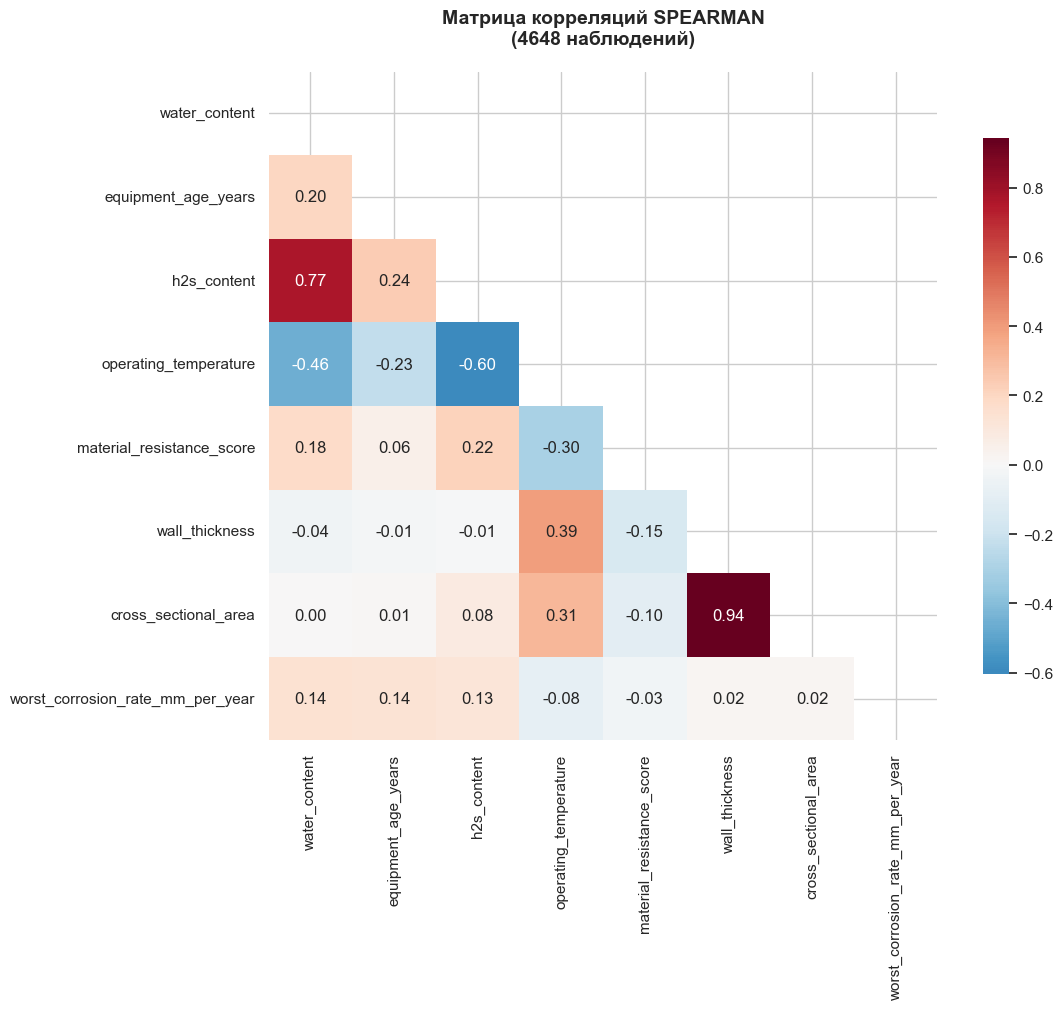

ТОП-7 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ SPEARMAN

📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ (p < 0.05):
  water_content                  | r =   0.142 *** 🡅
  equipment_age_years            | r =   0.138 *** 🡅
  h2s_content                    | r =   0.127 *** 🡅
  operating_temperature          | r =  -0.085 *** 🡇
  material_resistance_score      | r =  -0.033 * 🡇

📊 Статистика:
   Всего значимых корреляций: 5
   Максимальная корреляция: 0.142
   Минимальная корреляция: 0.020


In [54]:
# 1. Инициализация с любыми данными
analyzer = AdvancedCorrosionAnalyzer(DF)

# 2. Установка целевой переменной
analyzer.set_target('worst_corrosion_rate_mm_per_year')

# 3. Анализ корреляций для конкретных колонок
features_to_analyze = ['h2s_content', 'water_content', 'operating_temperature', 
                      'material_resistance_score', 'wall_thickness', 'equipment_age_years','cross_sectional_area']

correlations = analyzer.analyze_correlations(
    feature_columns=features_to_analyze,
    method='spearman',
    top_k=15,
    plot_matrix=True
)


🔬 Тестируем набор: 1
   Признаки: ['operating_temperature', 'operating_pressure', 'material_resistance_score']


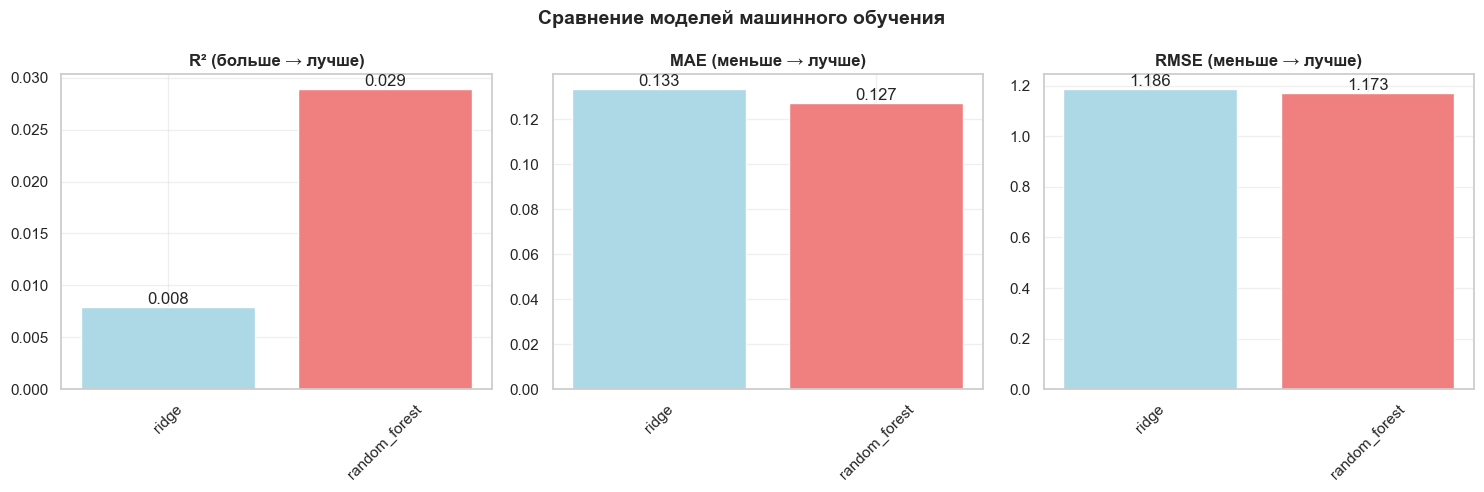

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0079 | MAE =  0.1333 | RMSE =  1.1857
   random_forest   | R² =  0.0289 | MAE =  0.1270 | RMSE =  1.1731

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0289)

🔬 Тестируем набор: 2
   Признаки: ['cross_sectional_area', 'component_type_id', 'nominal_thickness_mmc', 'h2s_content', 'operating_temperature', 'operating_pressure', 'water_content']


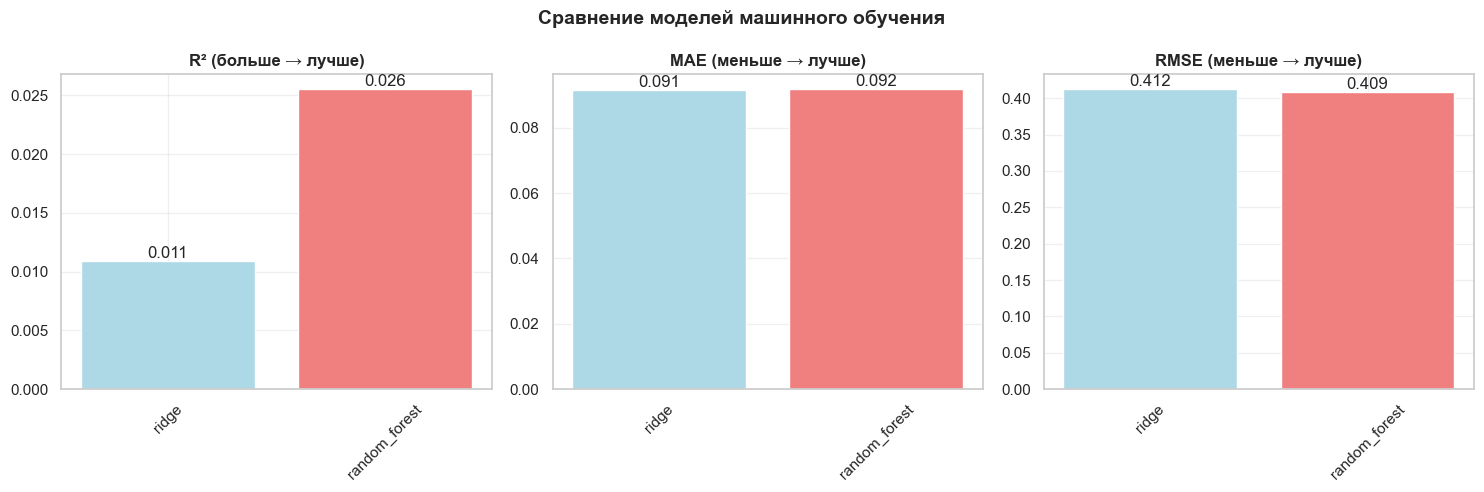

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0109 | MAE =  0.0914 | RMSE =  0.4121
   random_forest   | R² =  0.0255 | MAE =  0.0917 | RMSE =  0.4091

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0255)

🔬 Тестируем набор: 3
   Признаки: ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years']


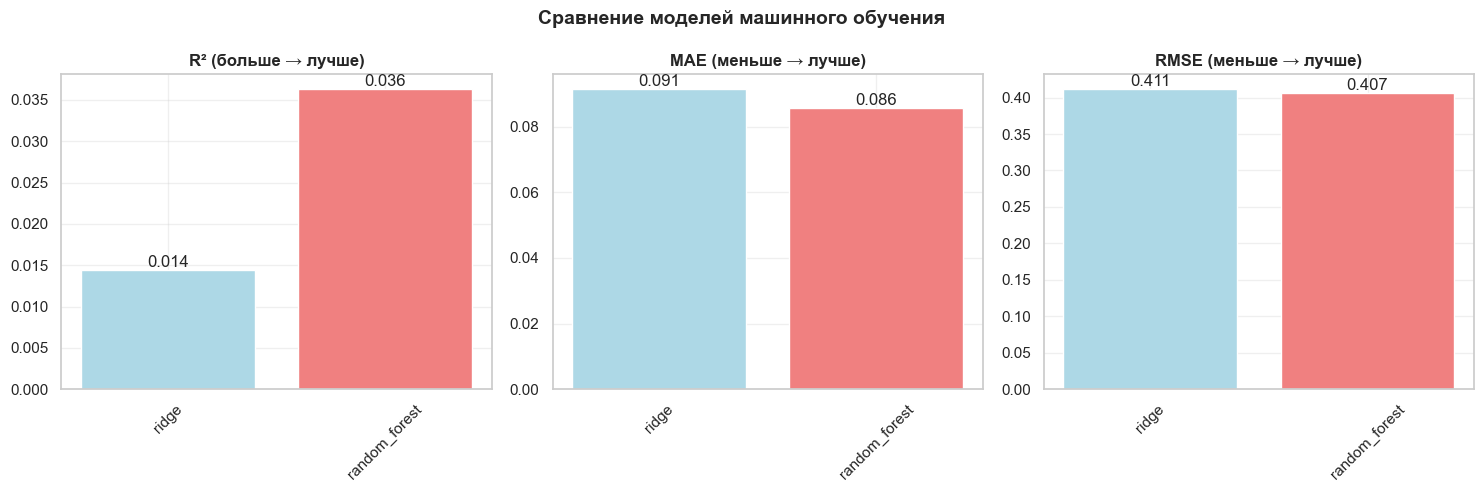

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0145 | MAE =  0.0914 | RMSE =  0.4114
   random_forest   | R² =  0.0363 | MAE =  0.0858 | RMSE =  0.4068

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0363)

🔬 Тестируем набор: 4
   Признаки: ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


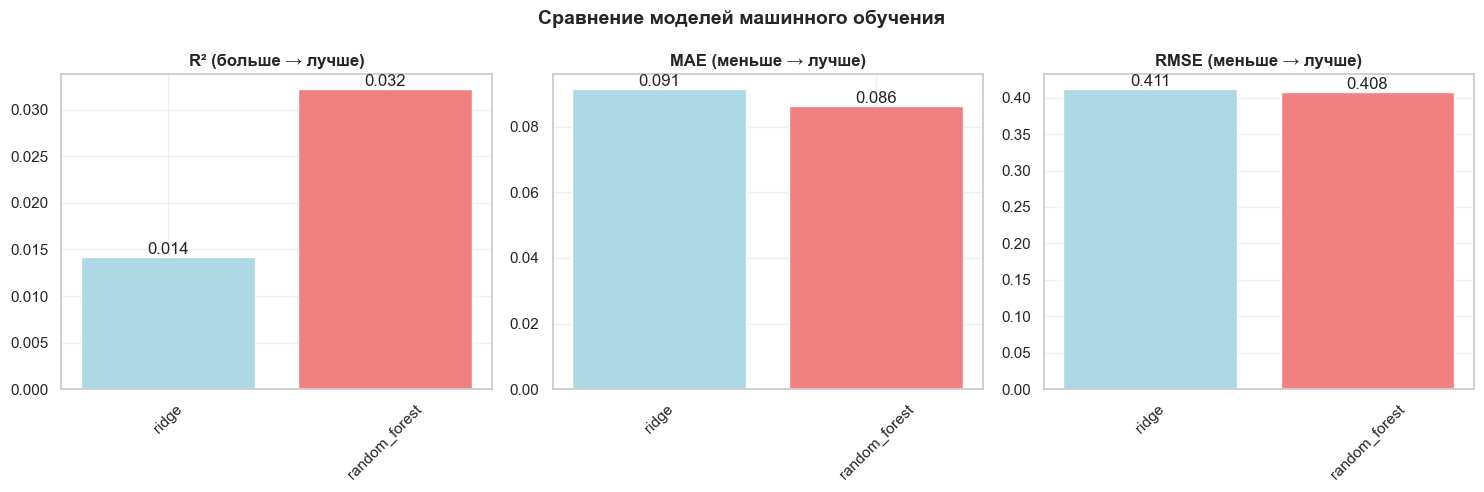

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0142 | MAE =  0.0914 | RMSE =  0.4114
   random_forest   | R² =  0.0322 | MAE =  0.0863 | RMSE =  0.4077

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0322)

🔬 Тестируем набор: 5
   Признаки: ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


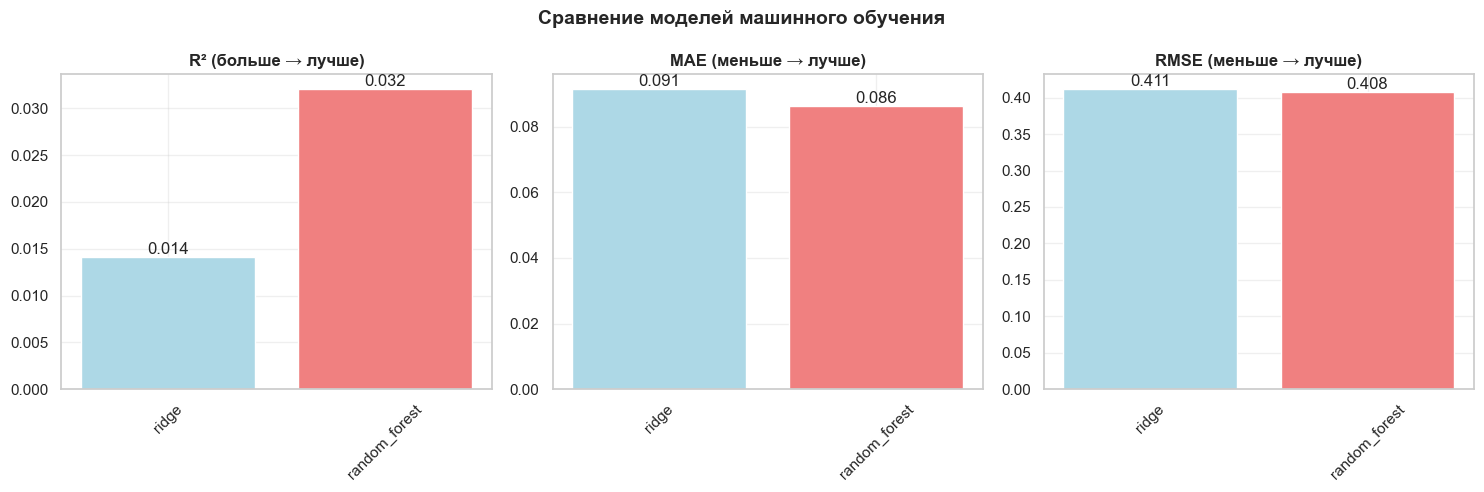

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0141 | MAE =  0.0914 | RMSE =  0.4114
   random_forest   | R² =  0.0320 | MAE =  0.0863 | RMSE =  0.4077

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0320)

🔬 Тестируем набор: 6
   Признаки: ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


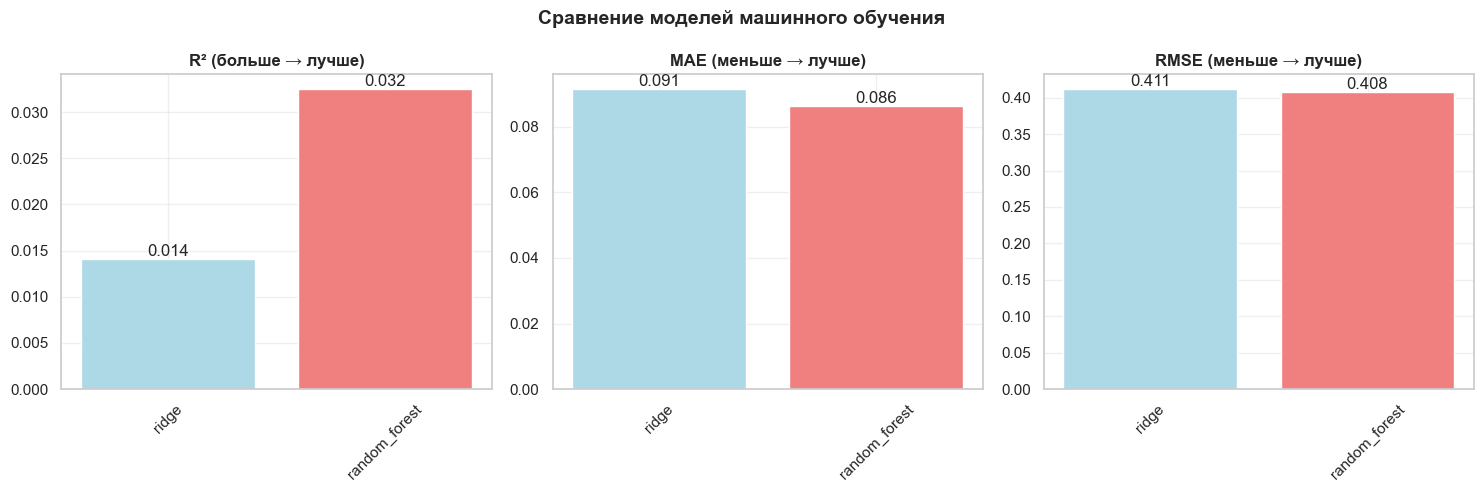

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0141 | MAE =  0.0913 | RMSE =  0.4114
   random_forest   | R² =  0.0325 | MAE =  0.0862 | RMSE =  0.4076

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0325)

🔬 Тестируем набор: 7
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


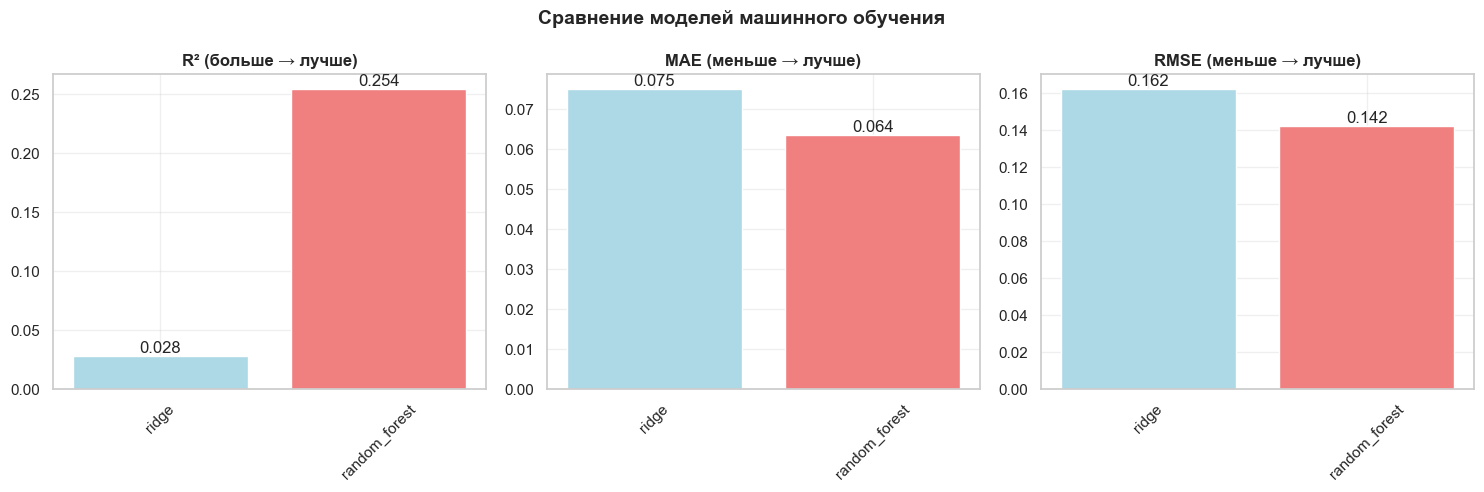

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0281 | MAE =  0.0750 | RMSE =  0.1621
   random_forest   | R² =  0.2542 | MAE =  0.0637 | RMSE =  0.1420

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2542)

🔬 Тестируем набор: 8
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'chloride_aggressiveness']


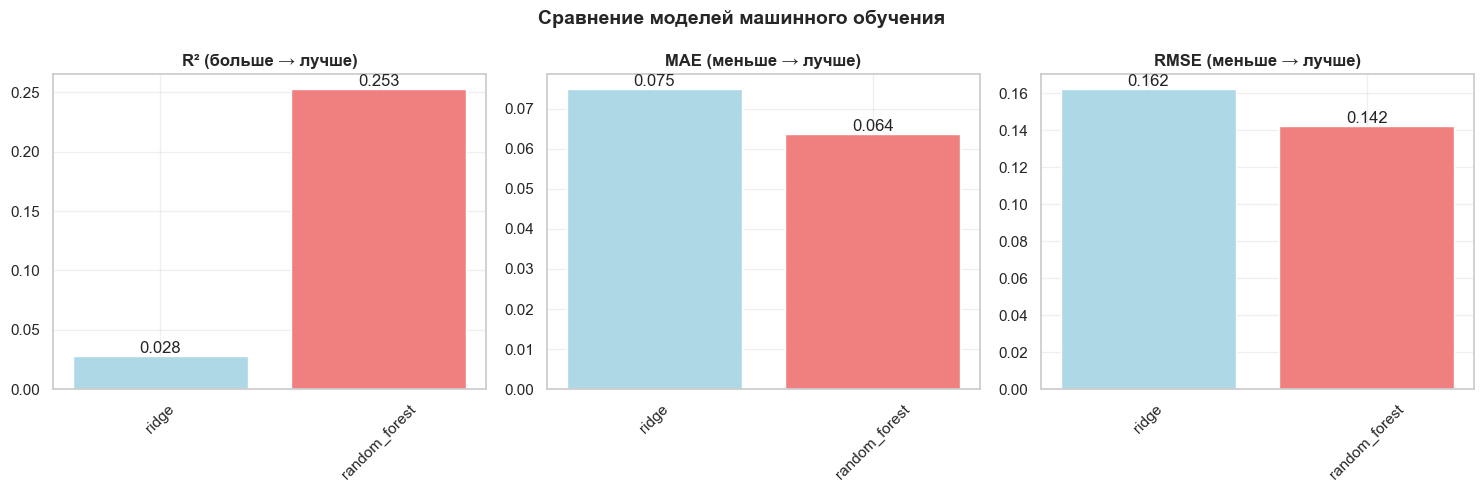

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0281 | MAE =  0.0748 | RMSE =  0.1621
   random_forest   | R² =  0.2526 | MAE =  0.0638 | RMSE =  0.1421

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2526)

🔬 Тестируем набор: 9
   Признаки: ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'underdeposit_corrosion_index']


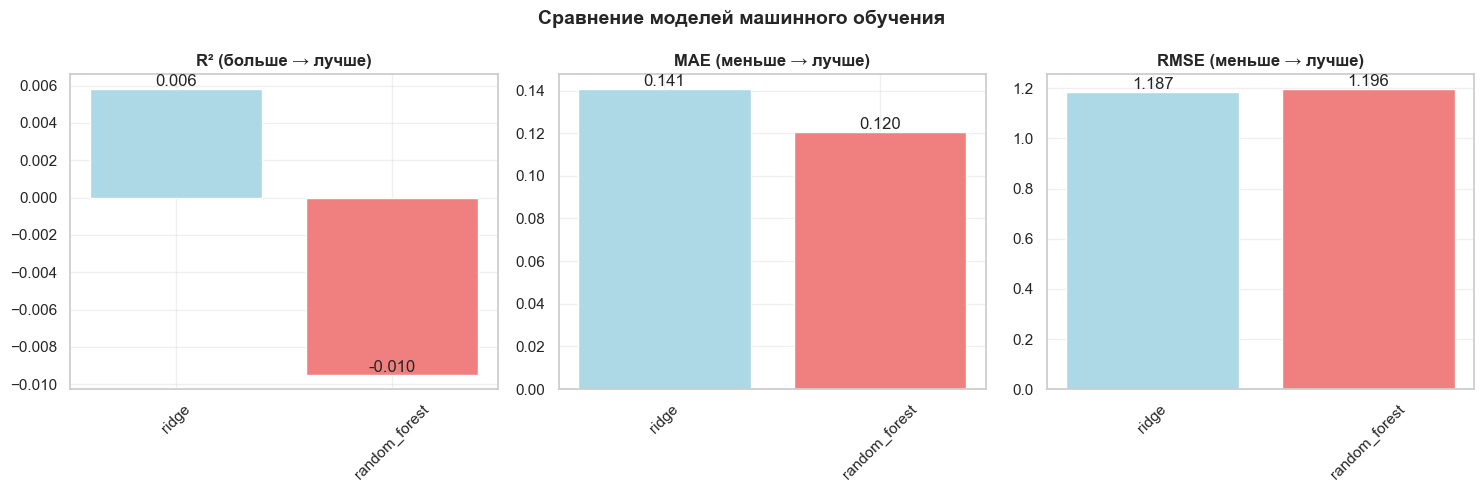

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0058 | MAE =  0.1406 | RMSE =  1.1869
   random_forest   | R² = -0.0095 | MAE =  0.1204 | RMSE =  1.1961

🎯 ЛУЧШАЯ МОДЕЛЬ: ridge (R² = 0.0058)

🔬 Тестируем набор: 10
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'cross_sectional_area']


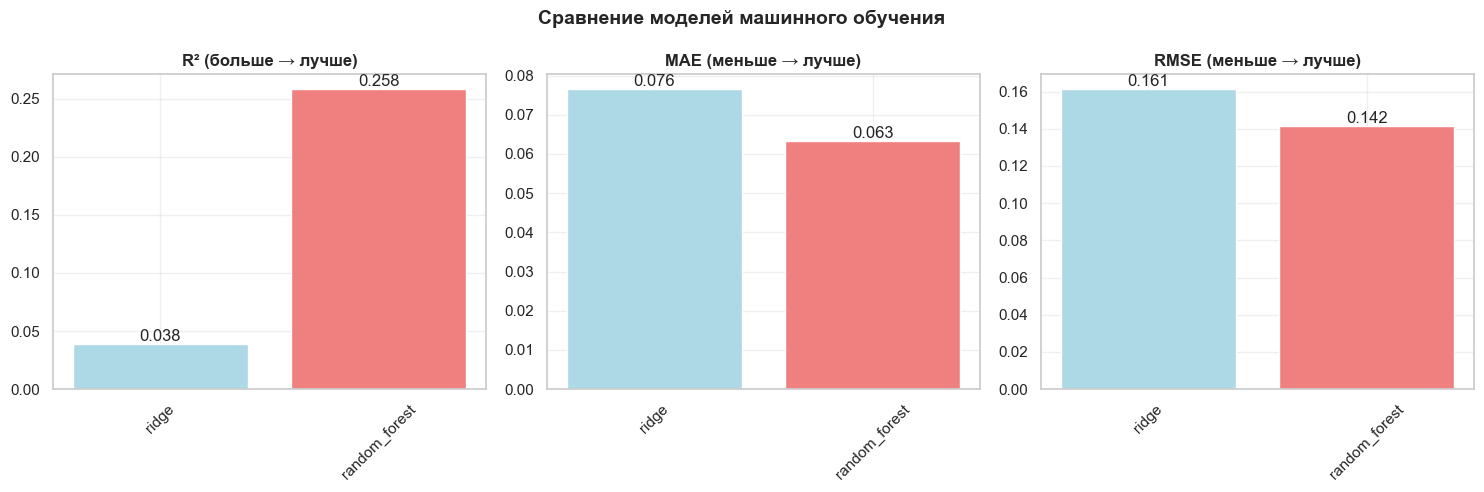

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0385 | MAE =  0.0765 | RMSE =  0.1612
   random_forest   | R² =  0.2581 | MAE =  0.0634 | RMSE =  0.1416

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2581)


<Figure size 1200x600 with 0 Axes>

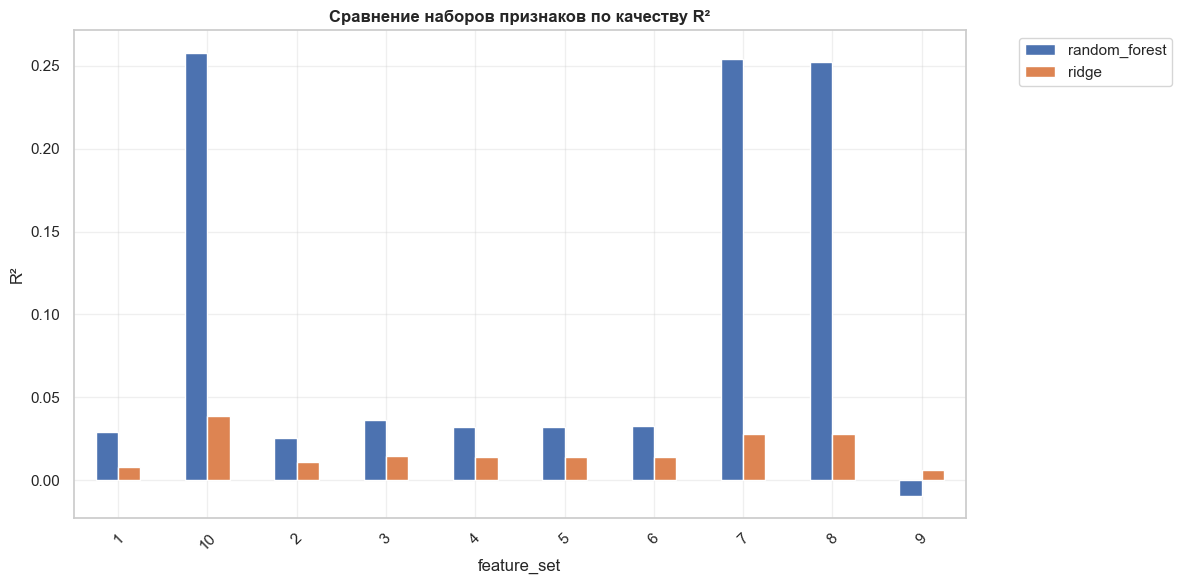

In [55]:
# 5. Сравнение разных наборов признаков
feature_sets = {
    '1': ['operating_temperature', 'operating_pressure', 'material_resistance_score'],
    '2': ['cross_sectional_area','component_type_id','nominal_thickness_mmc','h2s_content','operating_temperature','operating_pressure','water_content'],
    '3': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years'],
    '4': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '5': ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '6': ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '7': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '8': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','chloride_aggressiveness'],
    '9': ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','underdeposit_corrosion_index'],
    '9': ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','underdeposit_corrosion_index'],
    '10': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index','cross_sectional_area'],

}

comparison = analyzer.compare_feature_sets(feature_sets)


🔬 Тестируем набор: 10
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'stress_corrosion_index']


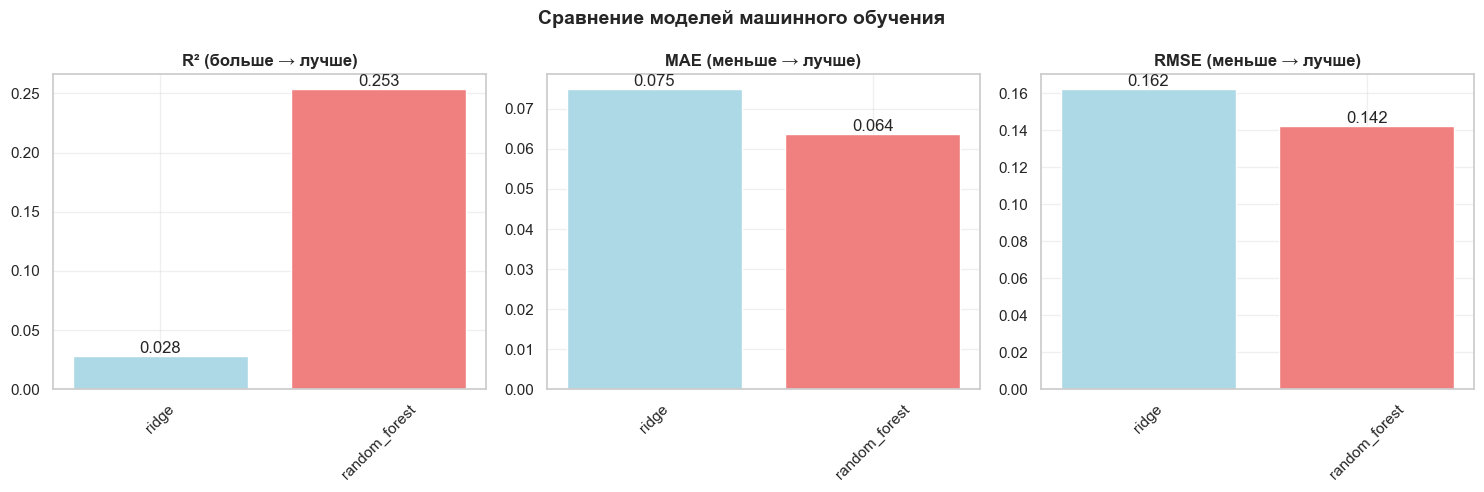

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0282 | MAE =  0.0749 | RMSE =  0.1621
   random_forest   | R² =  0.2534 | MAE =  0.0637 | RMSE =  0.1420

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2534)

🔬 Тестируем набор: 11
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index']


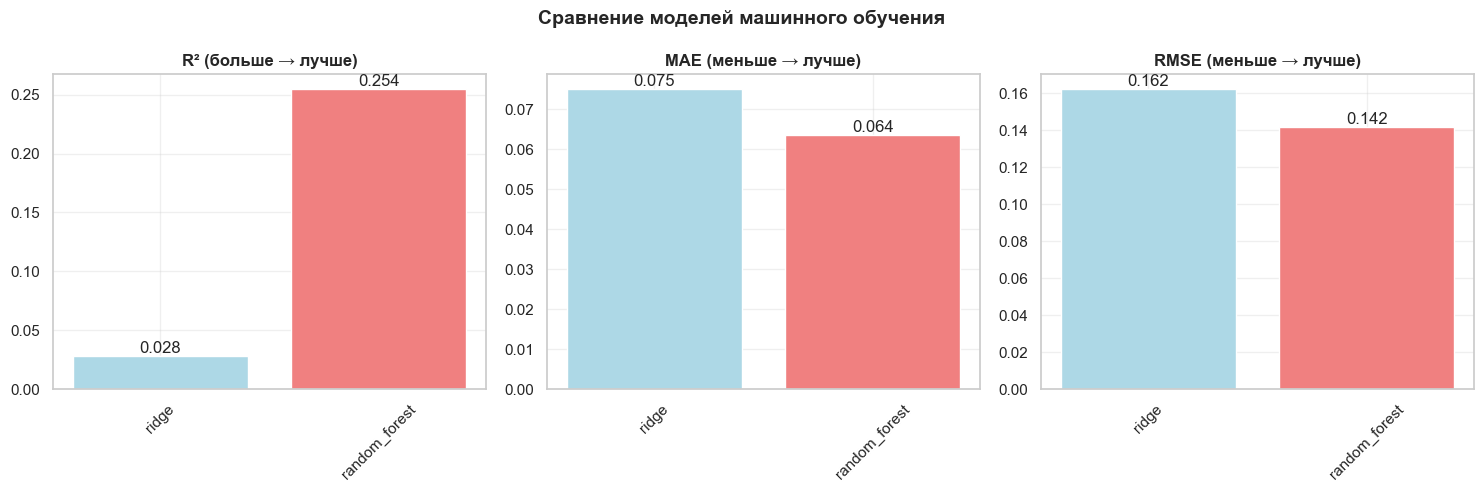

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0281 | MAE =  0.0750 | RMSE =  0.1621
   random_forest   | R² =  0.2545 | MAE =  0.0637 | RMSE =  0.1419

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2545)


<Figure size 1200x600 with 0 Axes>

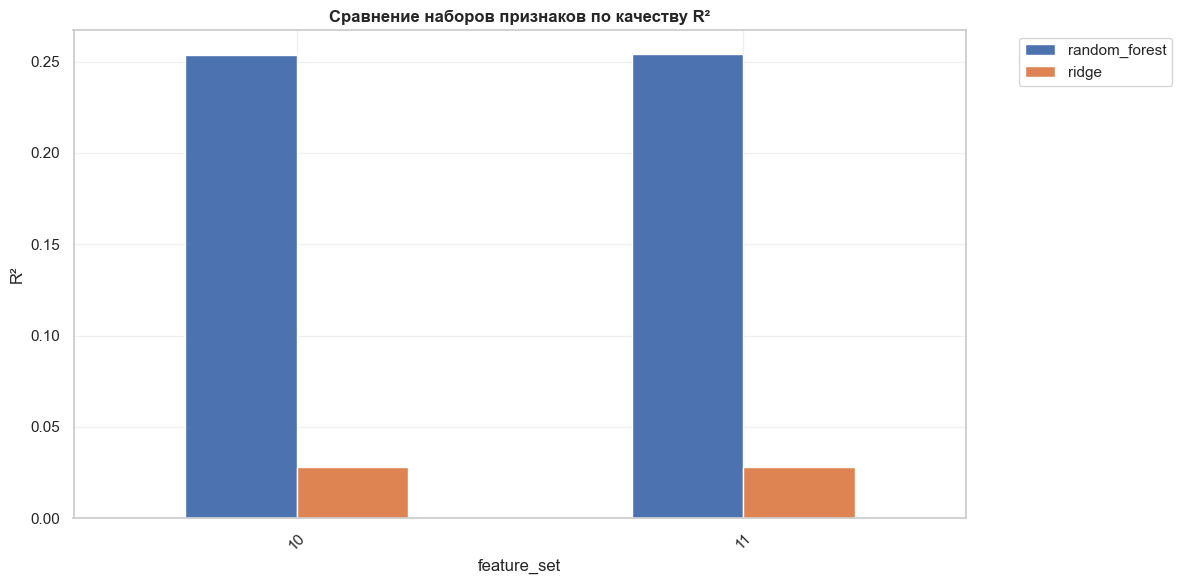

In [56]:
# 5. Сравнение разных наборов признаков
feature_sets = {
    '10': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index','stress_corrosion_index'],
    '11': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index'],

}
 

comparison = analyzer.compare_feature_sets(feature_sets)